# Laporan Proyek Machine Learning - Aryaputra Maheswara

---

## Domain Proyek



Diabetes merupakan salah satu penyakit kronis yang menjadi tantangan besar dalam kesehatan global, dengan angka prevalensinya yang terus meningkat. Berdasarkan data dari Organisasi Kesehatan Dunia (WHO), lebih dari 400 juta orang di seluruh dunia hidup dengan diabetes, dan jumlah ini diperkirakan akan terus bertambah seiring dengan perubahan pola hidup dan semakin menua nya populasi [Diabetes Fact Sheet - WHO](https://www.who.int/news-room/fact-sheets/detail/diabetes) . Menurut International Diabetes Federation (IDF), Indonesia menduduki peringkat kelima negara dengan jumlah penderita diabetes terbanyak, dengan 19,5 juta orang yang mengidap diabetes pada tahun 2021. Angka ini diprediksi akan meningkat menjadi 28,6 juta pada tahun 2045. Masalah ini mendapatkan perhatian serius dari Kementerian Kesehatan, mengingat diabetes sering disebut sebagai "ibu dari segala penyakit", karena dapat memicu berbagai komplikasi serius lainnya [Saatnya Mengatur  Si Manis - Kemenkes](https://sehatnegeriku.kemkes.go.id/baca/blog/20240110/5344736/saatnya-mengatur-si-manis/).

Penyakit ini sering kali berkembang tanpa gejala yang jelas pada tahap awal, sehingga sering terdeteksi terlambat ketika komplikasi sudah mulai muncul. Oleh karena itu, penting untuk mendeteksi dini orang-orang yang berisiko mengembangkan diabetes, guna mencegah komplikasi yang lebih serius, seperti penyakit jantung, kerusakan ginjal, kebutaan, hingga amputasi ekstremitas. Dengan mengetahui risiko sejak dini, kita bisa mengambil langkah pencegahan, seperti perubahan gaya hidup, pengelolaan berat badan, serta pengaturan pola makan dan aktivitas fisik.

Dengan kemajuan teknologi, khususnya dalam bidang machine learning dan predictive analytics, kini ada peluang besar untuk meningkatkan akurasi dan efisiensi dalam mendeteksi risiko diabetes. Machine learning memungkinkan kita untuk menganalisis pola-pola dalam data medis yang kompleks, yang dapat digunakan untuk memprediksi kemungkinan seseorang mengidap diabetes berdasarkan berbagai faktor risiko, seperti usia, indeks massa tubuh (BMI), tingkat aktivitas fisik, tekanan darah, dan tingkat gula dalam darah.

---

## Business Understanding

### Problem Statements

- Berapa persentase responden yang mengidap penyakit diabetes ?
- Apakah jenis kelamin memiliki jumlah diabetes yang berbeda ?
- Apa faktor - faktor yang mempengaruhi diabetes ?
- Apa model terbaik yang dapat digunakan untuk memprediksi penyakit diabetes ?

### Goals

- Mengetahui total persentase responden yang mengidap penyakit diabetes
- Mencari perbandingan tingkat prevalensi diabetes dari jenis kelamin yang berbeda
- Mengetahui faktor - faktor yang mempengaruhi diabetes
- Menentukan model terbaik berdasarkan akurasi tertinggi untuk memprediksi penyakit diabetes pada resopenden

### Solution

- Melakukan proses Exploratory Data Analysis (EDA)
- Menggunakan 3 model machine learning, yaitu Logistic Regression, Decision Tree, dan Random Forest
- Menggunakan GridSearchCV untuk menemukan parameter terbaik
- Menggunakan confusion matrix dan accuracy score

# Data Loading

In [1]:
# Library yang sering digunakan
import os, shutil
import zipfile
from shutil import copyfile
import numpy as np
import pandas as pd 
from tqdm.notebook import tqdm as tq 

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

2024-11-13 16:19:28.783464: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 16:19:28.866538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-13 16:19:28.909539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-13 16:19:28.927350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 16:19:28.997101: I tensorflow/core/platform/cpu_feature_guar

Import dataset dari kaggle

In [2]:
exists = os.path.exists('diabetes-prediction-dataset.zip')
if not exists:
    # !kaggle datasets download mrsimple07/obesity-prediction
    !kaggle datasets download iammustafatz/diabetes-prediction-dataset
else:
    print('Dataset is downloaded!')

Dataset is downloaded!


Ekstrak dataset

In [3]:
with zipfile.ZipFile('diabetes-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

Load data ke dalam variabel df

In [4]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Data Understanding

Pada proyek machine learning ini menggunakan data diabetes yang tersedia pada website kaggle [Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset), dataset ini berisi data medis dan demografik dari pasien berisi 100.000 baris sampel dan 9 kolom variabel. 

Terdapat 9 variabel dalam dataset:
| Variabel | Keterangan |
|----------|------------|
| gender |  Jenis kelamin responden (Laki - laki dan perempuan)|
| age | Usia responden |
| hypertension | Apakah responden memiliki hipertensi |
| heart_disease | Apakah responden memiliki penyakit jantung |
| smoking_history | Apakah responden memiliki riwayat merokok |
| bmi | Index Massa Berat badan responden |
| HbA1c_level | Hemoglobin A1c adalah ukuran kadar gula darah rata-rata seseorang selama 2-3 bulan terakhi |
| blood_glucose_level | Jumlah glukosa dalam aliran darah pada waktu tertentu |
| diabetes | variabel target yang diprediksi, 1= memiliki diabetes, 0= tidak diabetes |

### Exploratory Data Analysis

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.shape

(100000, 9)

Melakukan pengecekan apakah ada data yang bernilai null atau tidak

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Tidak ada data yang bernilai null

Melakukan drop pada nilai yang duplikat

In [8]:
# Cek apakah ada nilai duplikat
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


Terdapat data duplikat sebanyak 3854, data tersebut telah dihapus


In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Responden memiliki rentang
- Usia 0.08 - 80 tahun
- BMI 10 - 95
- HbA1c 3.5 - 9
- blood_glucose_level 80 - 300

---

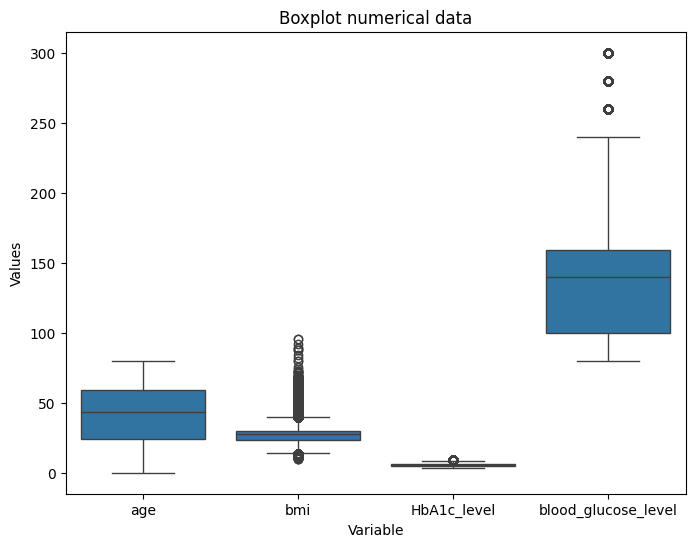

In [11]:
df_melted = df.melt(value_vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], var_name='Variable', value_name='Value')

# Plotting
plt.figure(figsize=(8, 6))
sns.boxplot(x='Variable', y='Value', data=df_melted)
plt.title("Boxplot numerical data")
plt.ylabel("Values")
plt.show()

Pada gambar diatas, terdapat outlier pada bmi (95), HbA1c_level (9), dan blood_glucose_level (300). Namun outlier tidak dihapus karena seseorang mungkin memiliki kondisi tersebut

---

Memeriksa nilai kolom gender yang berisi jenis kelamin responden

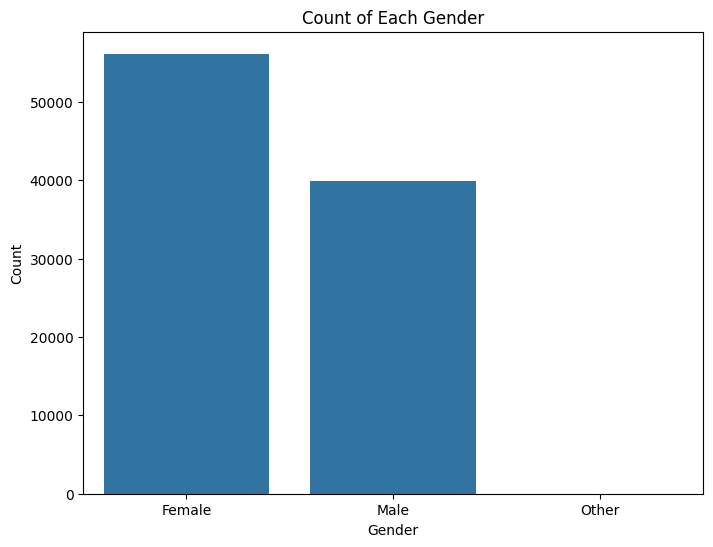

In [12]:
df['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Terdapat gender yang bernilai other, melakukan drop pada gender yang memiliki value other karena merupakan missing value

In [13]:
df = df[df['gender'] != 'Other']

---

Distribusi variabel numerik

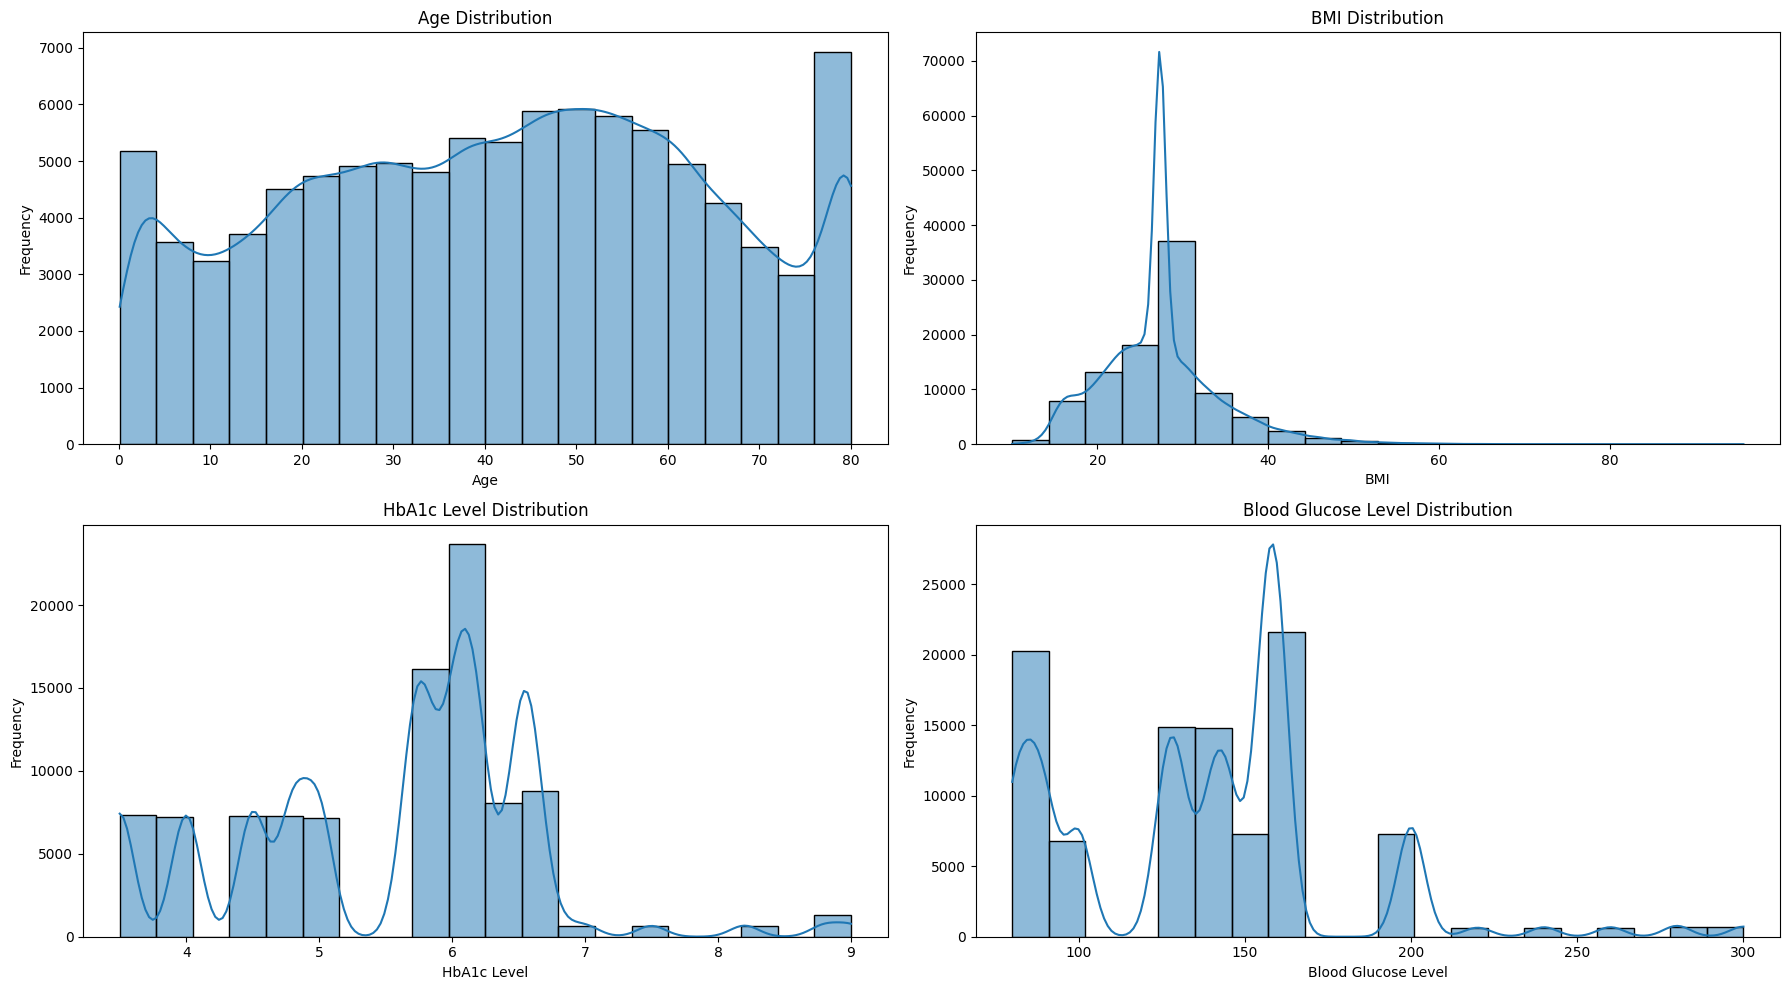

In [14]:
# Plotting setiap variabel di subplot yang berbeda
plt.figure(figsize=(18, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI distribution
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# HbA1c Level distribution
plt.subplot(2, 2, 3)
sns.histplot(df['HbA1c_level'], bins=20, kde=True)
plt.title('HbA1c Level Distribution')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

# Blood Glucose Level distribution
plt.subplot(2, 2, 4)
sns.histplot(df['blood_glucose_level'], bins=20, kde=True)
plt.title('Blood Glucose Level Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Berdasarkan histogram diatas:
Age Distribution:
- Distribusi umur relatif seragam di sebagian besar rentang usia, dengan sedikit kenaikan di usia 50 hingga 60 tahun.
- Ada lonjakan pada usia yang lebih muda (mungkin di sekitar usia 0-5 tahun) dan di usia 80-an.
- Ini bisa menunjukkan bahwa dataset mencakup banyak individu muda dan lansia, mungkin karena faktor populasi tertentu dalam data.

BMI Distribution:

- Distribusi bmi sangat right-skewed atau menceng ke kanan.
- Sebagian besar nilai bmi terkonsentrasi antara 15 hingga 30, dengan puncak yang tajam di sekitar 20.
- Beberapa outlier tampak memiliki nilai bmi yang lebih tinggi di atas 40, namun jumlahnya sangat sedikit.
- Skewness ini menunjukkan bahwa sebagian besar individu dalam dataset memiliki bmi dalam rentang normal hingga sedikit kelebihan berat badan, sementara beberapa orang mungkin obesitas.

HbA1c Level Distribution:

- Distribusi HbA1c_level memiliki beberapa puncak, menunjukkan bahwa data mungkin bimodal atau memiliki beberapa kluster nilai.
- Puncak utama berada di sekitar level 5.5 hingga 6.5, yang menunjukkan nilai HbA1c yang mendekati batas diabetes atau pradiabetes.
- Ada beberapa nilai yang lebih tinggi (di atas 7), yang biasanya menunjukkan kondisi diabetes, tetapi jumlahnya relatif lebih kecil.

Blood Glucose Level Distribution:

- Distribusi blood_glucose_level juga memiliki beberapa puncak dengan rentang utama antara 80 hingga 200.
- Rentang umum dari 100-150 menunjukkan bahwa sebagian besar individu memiliki kadar glukosa yang relatif normal atau sedikit lebih tinggi.
- Beberapa outlier dengan nilai yang lebih tinggi dari 200 menunjukkan individu dengan kadar glukosa yang tinggi, yang dapat menunjukkan risiko diabetes atau masalah kesehatan lainnya.

---

Memeriksa prevalensi diabetes berdasarkan jenis kelamin

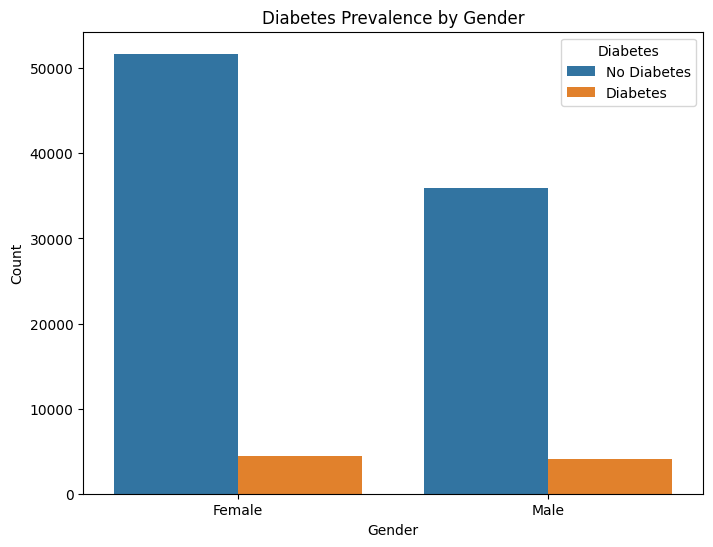

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Diabetes Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

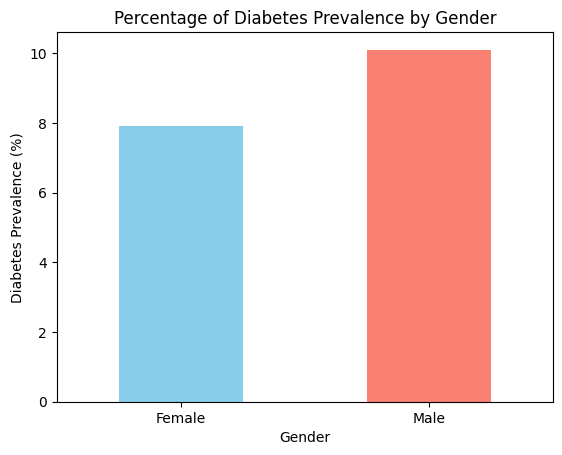

In [16]:
diabetes_counts = df[df['diabetes'] == 1].groupby('gender').size()
gender_counts = df['gender'].value_counts()
diabetes_percentage = (diabetes_counts / gender_counts) * 100

diabetes_percentage.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Percentage of Diabetes Prevalence by Gender")
plt.xlabel("Gender")
plt.ylabel("Diabetes Prevalence (%)")
plt.xticks(rotation=0)
plt.show()

Jumlah persentase total dari responden yang mengidap penyakit diabetes adalah 18%

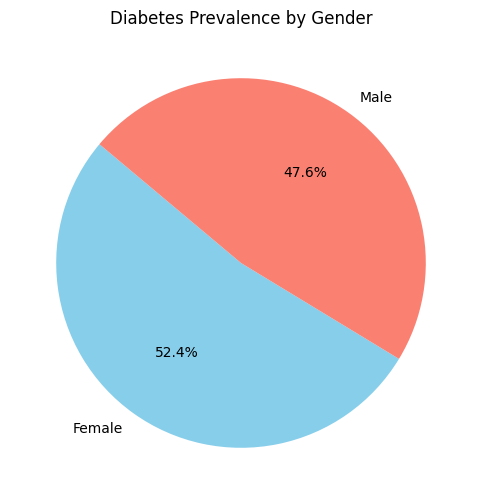

In [17]:
# Filter untuk kasus diabetes saja (diabetes = 1) dan menghitung jumlah kemunculan berdasarkan jenis kelamin
diabetes_counts = df[df['diabetes'] == 1]['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Diabetes Prevalence by Gender")
plt.show()

Perbandingan prevalensi diabetes pada setiap jenis kelamin

- Perempuan memiliki prevalensi yang lebih tinggi dari laki - laki sebanyak 10% untuk perempuan dan 8% untuk laki - laki dari jumlah seluruh responden
- Dari seluruh responden yang mengidap penyakit diabetes, perempuan memiliki prevalensi sebanyak 52.4% dan laki - laki sebanyak 47.6%

---

Korelasi diabetes dengan jumlah kadar gula dalam darah

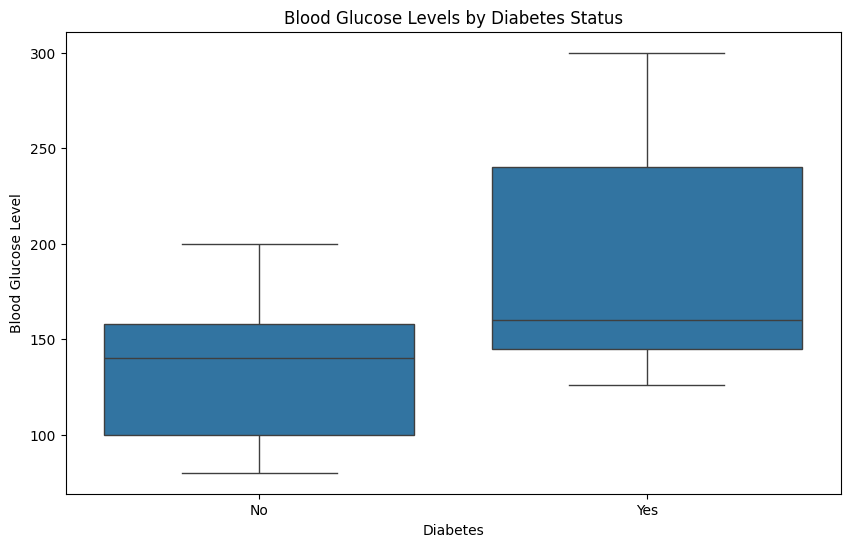

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Data diatas menunjukkan adanya perbedaan tingkat glukosa darah antara individu dengan dan tanpa diabetes, dengan individu yang memiliki diabetes cenderung memiliki tingkat glukosa darah yang lebih tinggi dan distribusi data yang lebih bervariasi.

Analisis Multivariate dengan menggunakan Heatmap, untuk melihat korelasi antara variabel

In [19]:
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

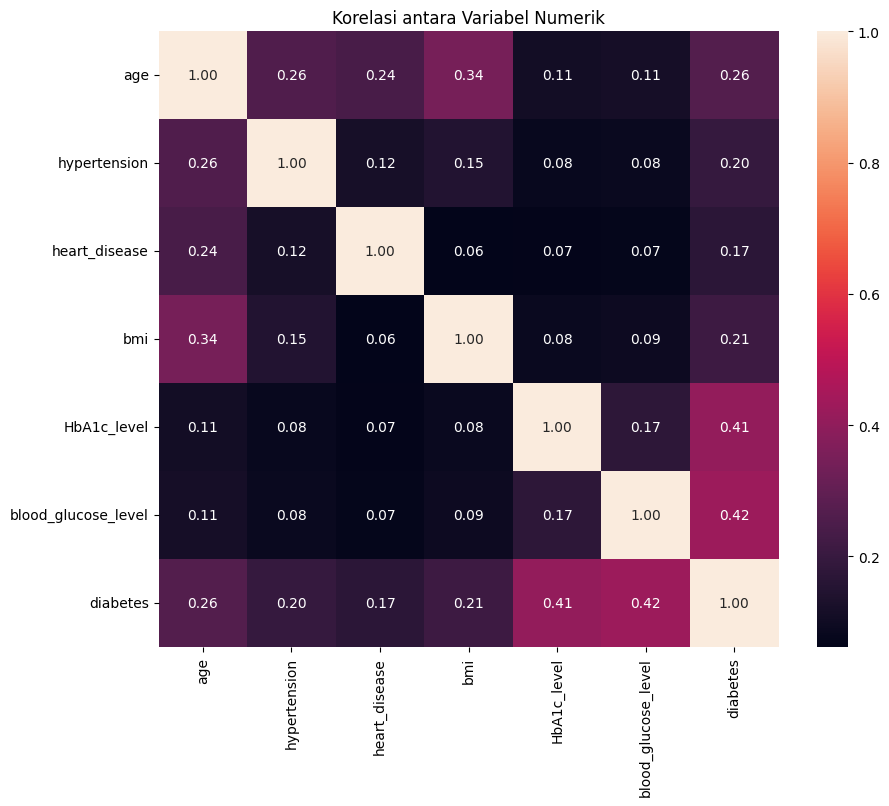

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f')
plt.title('Korelasi antara Variabel Numerik')
plt.show()

Diabetes pada responden memiliki:
- Korelasi positif yang cukup kuat dengan level HbA1c dan kadar glukosa dalam darah
- Korelasi positif yang lemah terhadap usia, hipertensi, riwayat penyakit jantung, dan bmi

---

# Data Preparation

Data preparation adalah serangkaian langkah yang dilakukan untuk menyiapkan data agar dapat digunakan dalam pelatihan model machine learning. Proses ini sangat penting karena kualitas dan struktur data yang tepat dapat mempengaruhi kinerja model secara signifikan

Teknik yang digunakan :
- Data cleaning, untuk membersihkan data yang memiliki missing value
    - Data yang hilang atau kosong bisa menyebabkan model gagal mempelajari pola dengan benar. Mengatasi nilai yang hilang atau kosong sangat penting agar model tidak terdistorsi atau tidak dapat digunakan.
- Standarisasi, mengubah rentang data numerik agar memiliki skala yang sama
    - Fitur dengan skala yang sangat berbeda dapat mempengaruhi kinerja algoritma, terutama algoritma yang sensitif terhadap jarak, seperti KNN
- Encoding, Mengonversi data kategorikal menjadi format numerik 
    - Karena banyak algoritma machine learning hanya dapat bekerja dengan data numerik. Oleh karena itu, encoding fitur kategorikal (sepert gender) ke format numerik memungkinkan model untuk memproses dan memahami data tersebut.
- Pembagian data (Data Splitting), Membagi data menjadi data latih (train) dan data uji (test)
    - Dengan memisahkan data, kita dapat melatih model dengan data tertentu dan mengujinya pada data yang belum pernah dilihat sebelumnya, untuk mendapatkan gambaran yang lebih realistis tentang seberapa baik model akan bekerja dalam aplikasi nyata.

---

### Menangani Missing Value

Distribusi riwayat merokok responden

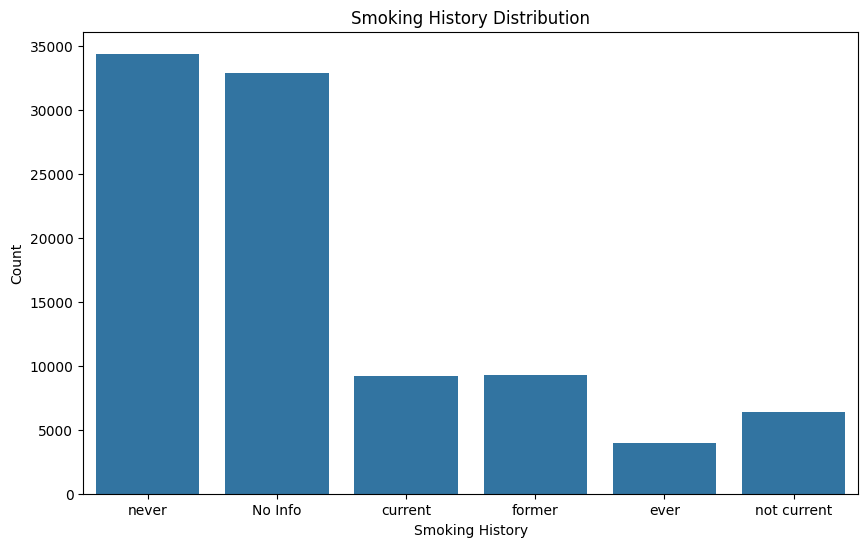

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_history')
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

Dari gambar diatas, terdapat variabel bernama No info yang merupakan missing value, oleh karena itu maka responden dengan riwayat merokok no info dapat di hapus.

In [22]:
# Data No Info pada smoking_history tidak digunakan

df = df.loc[df['smoking_history'] != 'No Info']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63247 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               63247 non-null  object 
 1   age                  63247 non-null  float64
 2   hypertension         63247 non-null  int64  
 3   heart_disease        63247 non-null  int64  
 4   smoking_history      63247 non-null  object 
 5   bmi                  63247 non-null  float64
 6   HbA1c_level          63247 non-null  float64
 7   blood_glucose_level  63247 non-null  int64  
 8   diabetes             63247 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.8+ MB


### Encoding

Melakukan encoding pada data kategorikal menjadi data numerik agar bisa diterima oleh model machine learning

In [ ]:
# Melakukan encoding pada kolom kategori smoking history menjadi nilai 0 dan 1 dengan menggunakan map, 0=tidak merokok dan 1=pernah merokok
df['smoking_history'] = df['smoking_history'].map({
    'never': 0,
    'former': 1,
    'current': 1,
    'not current': 1,
    'ever': 1
})

In [25]:
# Melakukan encoding pada kolom kategori gender menjadi nilai 0 dan 1 dengan menggunakan map, 0=Perempuan dan 1=Laki - laki
df['gender'] = df['gender'].map({
    'Female': 0,
    'Male': 1,
})

### Melakukan Train-Test-Split

In [26]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

    Menggunakan rasio pembagian data latih uji sebesar 90:10 dikarenakan jumlah dataset yang cukup besar sebesar 63 ribu sampel

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [28]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 63247
Total # of sample in train dataset: 56922
Total # of sample in test dataset: 6325


### Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.

In [29]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [30]:
X_train[numerical_features].describe().round(4)

,age,bmi,HbA1c_level,blood_glucose_level
count,56922.0000,56922.0000,56922.0000,56922.0000
mean,46.5602,28.4403,5.5674,139.6930
std,19.5461,6.5620,1.0964,42.1854
min,0.1600,10.0800,3.5000,80.0000
25%,31.0000,24.5100,4.8000,100.0000
50%,47.0000,27.3200,5.8000,140.0000
75%,61.0000,31.1700,6.2000,159.0000
max,80.0000,91.8200,9.0000,300.0000


In [31]:
scaler = StandardScaler()

# Melakukan standarisasi pada data train secara terpisah dari data test untuk menghindari terjadinya kebocoran informasi data uji
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].describe().round(4)

,age,bmi,HbA1c_level,blood_glucose_level
count,56922.0000,56922.0000,56922.0000,56922.0000
mean,-0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-2.3739,-2.7980,-1.8857,-1.4150
25%,-0.7961,-0.5989,-0.7000,-0.9409
50%,0.0225,-0.1707,0.2121,0.0073
75%,0.7388,0.4160,0.5770,0.4577
max,1.7108,9.6586,3.1309,3.8001


In [32]:
X_train[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level
65936,0.994573,0.496759,0.394565,0.481380
90664,-0.898407,0.905171,-1.429684,0.362854
55148,1.710835,-0.170722,0.941840,0.362854
9226,-1.461185,0.079202,-0.973622,0.362854
40558,-0.437952,-0.170722,0.120928,-1.296502


In [33]:
# Melakukan standarisasi pada data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/tmp/ipykernel_212654/1210831786.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.12580333  0.43396955  1.4295835  ...  0.00727786 -0.32459346
 -0.22977308]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


# Modelling

---

## Logistic Regression


Logistic regression adalah algoritma klasifikasi berbasis model linear yang memprediksi probabilitas kelas tertentu berdasarkan input fitur. Model ini bekerja dengan menghitung fungsi linear dari fitur, kemudian mengaplikasikan fungsi sigmoid (logistic function) untuk mengonversi hasilnya menjadi probabilitas antara 0 dan 1. Berdasarkan probabilitas tersebut, model kemudian memutuskan apakah input termasuk dalam kelas tertentu (biner) atau kelas yang lebih umum dalam versi multiklas. [1]

Kelebihan
- Sederhana dan Mudah Ditafsirkan: Logistic regression adalah model yang linear, sehingga mudah dipahami dan ditafsirkan. Koefisien dari model ini memberikan wawasan tentang hubungan antara fitur dan probabilitas kelas.
- Efisien secara Komputasi: Logistic regression relatif cepat untuk dilatih, sehingga cocok untuk dataset besar.
- Penanganan yang Baik untuk Data Biner: Sangat efektif untuk masalah klasifikasi biner atau situasi di mana hubungan antara fitur dan output bersifat linear.
- Dukungan untuk Regulasi: Dengan menggunakan regulasi seperti L1 atau L2 (penalty elasticnet), model ini mampu mencegah overfitting dan meningkatkan generalisasi.

Kekurangan
- Kurang Efektif pada Data yang Kompleks dan Non-Linear: Logistic regression tidak cocok untuk data yang memiliki hubungan non-linear antara fitur dan label.
- Terlalu Sederhana untuk Masalah yang Kompleks: Dalam masalah klasifikasi yang kompleks atau multi-kelas, logistic regression mungkin gagal memberikan kinerja yang baik dibandingkan dengan model yang lebih kompleks.
- Sensitif terhadap Outlier: Model ini bisa dipengaruhi oleh outlier pada data, yang dapat menyebabkan hasil yang kurang optimal

Parameter
- solver: Ini adalah algoritma yang digunakan untuk optimasi model. Dalam contoh ini, kita menggunakan 'saga', yang mendukung penalti elasticnet dan dapat menangani dataset besar.
- penalty: Ini menunjukkan jenis regularisasi yang diterapkan untuk mencegah overfitting. 'elasticnet' adalah kombinasi dari regulasi L1 dan L2, yang mengendalikan kompleksitas model.
- l1_ratio: Ini adalah rasio antara L1 dan L2 dalam regularisasi elasticnet. Nilai ini berkisar antara 0 (hanya L2) dan 1 (hanya L1). Dengan menyesuaikan rasio ini, kita dapat mengatur keseimbangan antara kedua jenis regularisasi.
- C: Ini adalah parameter regularisasi yang menentukan seberapa besar penalti yang dikenakan pada koefisien. Nilai yang lebih kecil dari C berarti regularisasi yang lebih kuat, sehingga cenderung membuat model lebih sederhana.

---

## Random Forest

Random forest adalah algoritma berbasis ensemble yang terdiri dari banyak pohon keputusan (decision trees) [2]. Setiap pohon dilatih dengan sampel acak dari data dan fitur yang berbeda, menghasilkan model independen yang memprediksi secara terpisah. Hasil prediksi dari setiap pohon kemudian digabungkan dengan metode voting (untuk klasifikasi) atau rata-rata (untuk regresi) untuk mendapatkan prediksi akhir [3].

Kelebihan
- Kemampuan untuk Menangani Data yang Kompleks: Random forest terdiri dari banyak pohon keputusan (decision trees), sehingga memiliki kemampuan untuk menangkap pola yang kompleks dan interaksi antar fitur.
- Stabil dan Tidak Mudah Overfit: Penggunaan ensemble (kombinasi dari banyak pohon) membuat model lebih stabil dan cenderung tidak overfit, bahkan pada dataset yang besar dan kompleks.
- Dapat Menangani Fitur Tidak Linear: Random forest dapat menangani data yang tidak linear secara alami, sehingga lebih fleksibel dalam berbagai masalah klasifikasi.
- Menyediakan Importance Features: Algoritma ini dapat mengidentifikasi fitur mana yang paling penting, sehingga memudahkan interpretasi.

Kekurangan
- Membutuhkan Sumber Daya Komputasi yang Besar: Random forest membutuhkan lebih banyak waktu dan memori dibanding model linear, terutama pada dataset besar.
- Kurang Efisien untuk Dataset Sangat Besar: Untuk dataset yang sangat besar, model ini bisa lambat saat melakukan prediksi.
- Kurang Mudah untuk Ditafsirkan: Dengan banyaknya pohon yang digunakan, sulit untuk menafsirkan hubungan antara fitur dan output secara langsung.

Parameter
- n_estimators: Jumlah pohon keputusan (decision trees) dalam hutan. Semakin banyak pohon, umumnya semakin baik hasilnya, tetapi waktu komputasi juga akan meningkat.
- max_depth: Kedalaman maksimum dari setiap pohon. Nilai ini mengendalikan kompleksitas model; semakin besar nilai max_depth, semakin kompleks pohonnya, tetapi dapat menyebabkan overfitting.
- min_samples_split: Jumlah minimum sampel yang diperlukan untuk memisahkan sebuah node dalam pohon. Nilai yang lebih tinggi dapat membuat model lebih sederhana dan mencegah overfitting.
- bootstrap: Menentukan apakah pohon-pohon dalam hutan akan dilatih menggunakan sampel bootstrap (diambil secara acak dengan penggantian). Jika True, model mungkin lebih stabil karena variasi antar-pohon lebih besar.

---

## K-Nearest Neighbors


K-Nearest Neighbors (KNN) adalah algoritma non-parametrik yang menentukan kelas suatu data baru berdasarkan sejumlah tetangga terdekatnya [4]. Algoritma ini menggunakan prinsip bahwa data dengan kelas yang sama cenderung berada dalam jarak yang berdekatan dalam ruang fitur. Kelas dari titik data baru kemudian ditentukan oleh mayoritas kelas dari tetangga terdekat [5].

Kelebihan
- Non-parametrik dan Fleksibel: KNN tidak membuat asumsi khusus tentang distribusi data, sehingga dapat bekerja baik pada data yang tidak memiliki pola linear.
- Mudah Dipahami dan Diterapkan: Algoritma ini sangat sederhana, hanya menghitung jarak antara titik data dan tetangganya, sehingga mudah dimengerti.
- Efektif untuk Dataset Kecil: KNN dapat memberikan performa yang baik pada dataset yang lebih kecil dan memiliki cluster yang terdefinisi dengan baik.

Kekurangan
- Lambat pada Dataset Besar: KNN membutuhkan waktu komputasi yang besar untuk mencari tetangga terdekat, terutama jika dataset sangat besar.
- Sensitif terhadap Skala Fitur: Karena bergantung pada perhitungan jarak, fitur dengan skala yang berbeda dapat mempengaruhi kinerja KNN. Oleh karena itu, normalisasi atau standarisasi fitur sering diperlukan.
- Rentan terhadap Outlier: KNN bisa sangat terpengaruh oleh outlier, karena tetangga terdekat dapat mencakup data yang tidak relevan atau noise.

Parameter
- n_neighbors: Jumlah tetangga terdekat yang akan dipertimbangkan dalam klasifikasi. Nilai yang lebih kecil cenderung membuat model lebih sensitif terhadap noise, sementara nilai yang lebih besar membuat model lebih stabil tetapi mungkin kurang presisi.
- weights: Menentukan bobot yang diberikan pada tetangga. 'uniform' berarti semua tetangga diberi bobot yang sama, sedangkan 'distance' memberikan bobot yang lebih besar pada tetangga yang lebih dekat.
- metric: Metode yang digunakan untuk mengukur jarak antara titik data. 'euclidean' adalah jarak biasa (garis lurus), sementara 'manhattan' mengukur jarak dalam grid (jarak absolut). Pilihan jarak yang tepat dapat memengaruhi kinerja model tergantung pada distribusi data.

---

## Hyperparameter Optimization

GridSearchCV adalah sebuah teknik dalam pemrograman machine learning yang digunakan untuk mencari parameter terbaik (hyperparameter) dari sebuah model secara sistematis. "Grid" mengacu pada pencarian dalam ruang parameter yang lebih besar, sementara "CV" merujuk pada cross-validation.

Parameter
- estimator: Parameter ini menunjukkan model yang akan dilakukan pencarian hyperparameter-nya.
- param_grid: Adalah dictionary yang berisi kombinasi hyperparameter yang ingin dicari
- cv: cross-validation, Cross-validation membantu dalam memvalidasi model agar performanya tidak terlalu bergantung pada pembagian data tertentu, mengurangi risiko overfitting.
- scoring: Menentukan metrik yang akan digunakan untuk mengevaluasi setiap kombinasi hyperparameter
    - AUC adalah metrik yang sering digunakan untuk mengukur performa model klasifikasi; semakin tinggi nilai AUC, semakin baik performa model dalam membedakan antara kelas positif dan negatif.
- n_jobs: Menentukan jumlah core CPU yang akan digunakan untuk menjalankan GridSearchCV, **-1** artinya semua core CPU akan digunakan

---

In [34]:
models = {
    'Logistic Regression': LogisticRegression(solver='saga', penalty='elasticnet', max_iter=5000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Deklarasi parameter grids untuk setiap model
param_grids = {
    'Logistic Regression': {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'C': [0.01, 0.1, 1, 10]  
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10],
        'bootstrap': [True, False]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

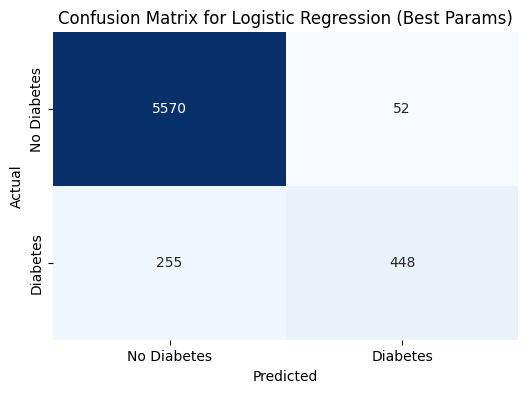

Classification Report for Logistic Regression (Best Params):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5622
           1       0.90      0.64      0.74       703

    accuracy                           0.95      6325
   macro avg       0.93      0.81      0.86      6325
weighted avg       0.95      0.95      0.95      6325

Best Parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}




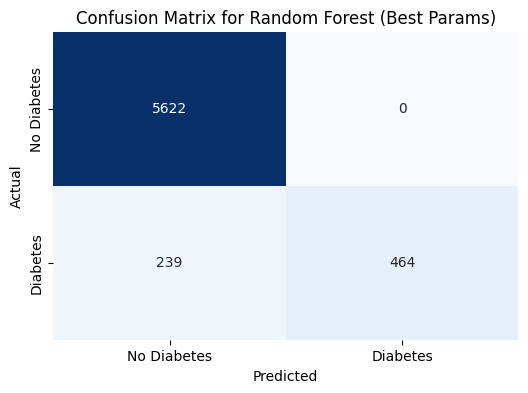

Classification Report for Random Forest (Best Params):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5622
           1       1.00      0.66      0.80       703

    accuracy                           0.96      6325
   macro avg       0.98      0.83      0.89      6325
weighted avg       0.96      0.96      0.96      6325

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}




/home/kingslaive/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


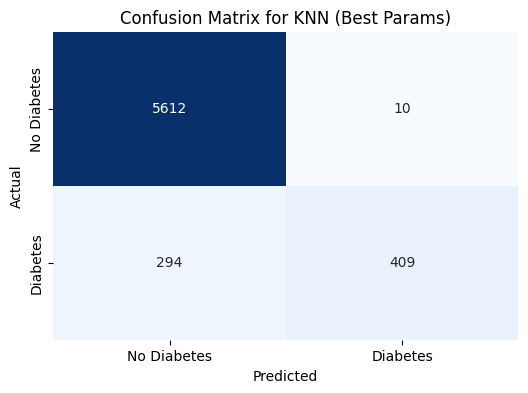

Classification Report for KNN (Best Params):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5622
           1       0.98      0.58      0.73       703

    accuracy                           0.95      6325
   macro avg       0.96      0.79      0.85      6325
weighted avg       0.95      0.95      0.95      6325

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}




,Model,Best Params,Accuracy,F1 Score
0,Logistic Regression,"{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasti...",0.951462,0.947798
1,Random Forest,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.962213,0.958737
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.951937,0.946446


In [35]:
# Dictionary yang akan menyimpan performa setiap model
model_performance = {}

# Loop ke setiap model dan parameter grid nya
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Mengambil best model pada best_estimator yang ada pada GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Melakukan prediksi
    y_pred = best_model.predict(X_test)
    
    # Kalkulasi metriks
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Menyimpan metriks
    model_performance[model_name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'F1 Score': f1,
    }

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix dengan heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix for {model_name} (Best Params)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report
    print(f"Classification Report for {model_name} (Best Params):")
    print(classification_report(y_test, y_pred))
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print("\n" + "="*60 + "\n")

    

# Konversi performa setiap model ke dalam dataframe agar lebih mudah di visualisasikan
performance_df = pd.DataFrame(model_performance).T.reset_index()
performance_df.rename(columns={'index': 'Model'}, inplace=True)
performance_df

# Evaluation

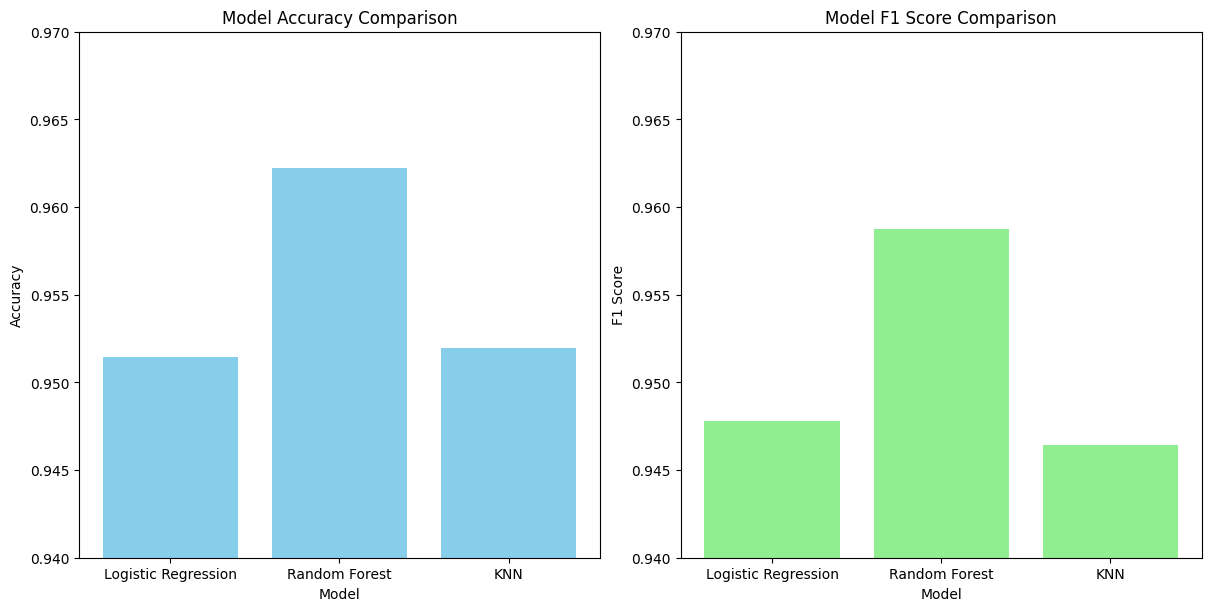

In [36]:
# Plotting Akurasi dan F1 Score model
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Bar chart untuk Akurasi
axs[0].bar(performance_df['Model'], performance_df['Accuracy'], color='skyblue')
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0.94, 0.97)

# Bar chart untuk F1 Score
axs[1].bar(performance_df['Model'], performance_df['F1 Score'], color='lightgreen')
axs[1].set_title('Model F1 Score Comparison')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('F1 Score')
axs[1].set_ylim(0.94, 0.97)

# Menampilkan plots
plt.show()

Kesimpulan : Model Random Forest merupakan model terbaik dari sisi akurasi maupun F1 Score

## Kesimpulan

1. Dari seluruh responden, 18% di antaranya mengidap penyakit diabetes, menunjukkan proporsi signifikan dari populasi yang terkena dampak.

2. Terdapat perbedaan tingkat prevalensi diabetes antara jenis kelamin, di mana perempuan memiliki prevalensi lebih tinggi (52,4%) dibandingkan laki-laki (47,6%).

3. Faktor-faktor yang mempengaruhi seseorang untuk mengidap diabetes meliputi level HbA1c, kadar glukosa dalam darah, indeks massa tubuh (BMI), usia, hipertensi, dan riwayat penyakit jantung. Faktor-faktor ini berkontribusi signifikan terhadap risiko diabetes.

4. Berdasarkan pengujian tiga model machine learning—Logistic Regression, Random Forest, dan K-Nearest Neighbors—untuk mendeteksi diabetes, model Random Forest menunjukkan akurasi tertinggi, menjadikannya model terbaik untuk memprediksi penyakit diabetes pada responden dalam dataset ini.

Referensi:
[1] Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied Logistic Regression (Vol. 398). John Wiley & Sons.
[2] Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32.
[3] Liaw, A., & Wiener, M. (2002). Classification and regression by randomForest. R News, 2(3), 18–22.
[4] Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21–27.
[5] Altman, N. S. (1992). An introduction to kernel and nearest-neighbor nonparametric regression. The American Statistician, 46(3), 175–185.